In [ ]:
#water body detection

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show, show_hist

In [6]:
#Read Rrs values
path=r'F://PhD//S2_2022_Acolited corrected_ndwi_rhow_Rrs//2022_11_28//2022_11_28_Rrs//Rrs_443.tif'
Rrs=rasterio.open(path)
Rrs

<open DatasetReader name='F:/PhD/S2_2022_Acolited corrected_ndwi_rhow_Rrs/2022_11_28/2022_11_28_Rrs/Rrs_443.tif' mode='r'>

In [7]:
#To display meta data
Rrs.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 6081,
 'height': 4934,
 'count': 1,
 'crs': CRS.from_epsg(32645),
 'transform': Affine(10.0, 0.0, 300000.0,
        0.0, -10.0, 2200020.0)}

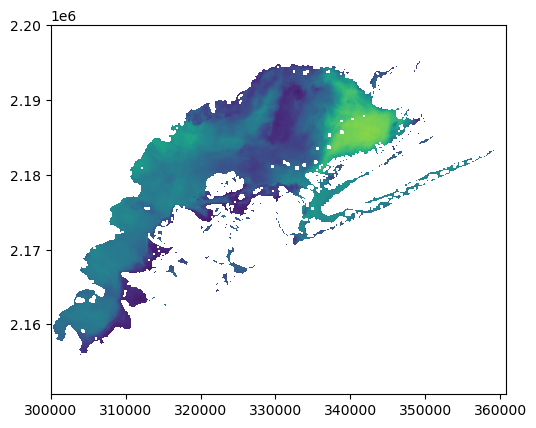

<Axes: >

In [10]:
show(Rrs)

In [11]:
Rrs_arr=Rrs.read()
Rrs_arr

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [18]:
# To replace nan values with 0
Rrs_arr2=Rrs.read()
Rrs_arr2=np.where(np.isnan(Rrs_arr2),0,Rrs_arr2)
Rrs_arr2

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [19]:
Rrs_arr2.shape

(1, 4934, 6081)

In [20]:
#To change the display of shape coordinates
Rrs_arr2=np.moveaxis(Rrs_arr2, 0, -1) #moving the value in 0 position to last one==> here the no. of layers is shifted to last
Rrs_arr2.shape

(4934, 6081, 1)

In [21]:
#To make an image usable for training==> multiply rows and columns
#convert 3d into 2d image
#X_train is same Rrs_arr2 but with different shape
X_train=np.reshape(Rrs_arr2,(Rrs_arr2.shape[0]*Rrs_arr2.shape[1],Rrs_arr2.shape[2]))
X_train.shape                    

(30003654, 1)

In [22]:
X_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
#Similarly select a Y_train image